# Kaggle - [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer/)

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
digits = pd.read_csv("data/train.csv")
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
digits = digits[0:1000]
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,4.401000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.888692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_train = digits.iloc[:,1:].values
y_train = digits[[0]].values.ravel()
X_train.shape

(1000, 784)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

/Users/jgzuke/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jgzuke/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(1000, 100)

## Grid Search

In [28]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
def search_and_cv(clf, param_grid):
    clf_grid = GridSearchCV(clf, param_grid, cv=4, n_jobs=4)
    clf_grid = clf_grid.fit(X_train_pca, y_train)
    print (clf_grid.best_params_)
    return clf_grid.best_estimator_

## Learning Curves

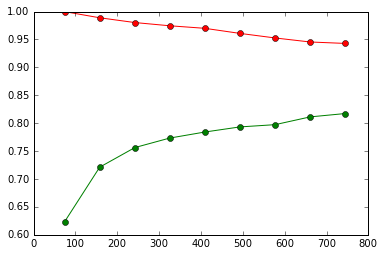

In [49]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#example-model-selection-plot-learning-curve-py
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_learning_curve(clf, X, y):
    train_sizes=np.linspace(.1, 1.0, 9)
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=4, n_jobs=4, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plot_learning_curve(clf, X_train_pca, y_train)

## Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100],
    'max_features': [10, 20, 40],
    'max_depth': [20, 40, 80],
    'criterion': ['gini', 'entropy']
}
clf = search_and_cv(RandomForestClassifier(), param_grid)
cross_val_score(clf, X_train_pca, y_train, cv=4)

{'criterion': 'entropy', 'max_features': 20, 'max_depth': 40, 'n_estimators': 100}


array([ 0.87301587,  0.86427146,  0.8757515 ,  0.87298387])

## SVM

In [105]:
from sklearn.svm import SVC
param_grid = [
    {'C': [10], 'kernel': ['linear']},
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
]
clf = search_and_cv(SVC(), param_grid)
cross_val_score(clf, X_train_pca, y_train, cv=4)

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
[ 0.90873016  0.91417166  0.92184369  0.92741935]


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Regression

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1]
}
clf = search_and_cv(LogisticRegression(), param_grid)
cross_val_score(clf, X_train_pca, y_train, cv=4)

{'C': 0.1}


array([ 0.76470588,  0.836     ,  0.85080645,  0.81781377])

## Neural Net

In [35]:
from sknn.mlp import Classifier, Layer
clf = Regressor(
    layers=[
        Layer("Rectifier", units=50),
        Layer("Softmax")],
    learning_rate=0.001,
    n_iter=25,
    batch_size=20)
clf.fit(X_train_pca, y_train)

Regressor(batch_size=20, callback=None, debug=False, dropout_rate=None,
     f_stable=0.001,
     hidden0=<sknn.nn.Layer `Rectifier`: frozen=False, name='hidden0', units=50>,
     layers=[<sknn.nn.Layer `Rectifier`: frozen=False, name='hidden0', units=50>, <sknn.nn.Layer `Softmax`: frozen=False, name='output', units=1>],
     learning_momentum=0.9, learning_rate=0.001, learning_rule='sgd',
     loss_type=None, n_iter=25, n_stable=10, normalize=None,
     output=<sknn.nn.Layer `Softmax`: frozen=False, name='output', units=1>,
     parameters=None, random_state=None, regularize=None, valid_set=None,
     valid_size=0.0, verbose=None, warning=None, weight_decay=None)

In [36]:
cross_val_score(clf, X_train_pca, y_train, cv=4)

array([-1.28550845, -1.30983883, -1.38284236, -1.59679865])

## BernoulliRBM

In [20]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
logistic = LogisticRegression()
rbm = BernoulliRBM(random_state=0)
clf = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
param_grid = {
    'rbm__n_iter':[30],
    #'rbm__n_components':[300],
    #'rbm__learning_rate':[0.00001, 0.0001, 0.001, 0.01], 
    #'linear__normalize':[0.00001],
}
clf = search_and_cv(clf, param_grid)
cross_val_score(clf, X_train_pca, y_train, cv=4)

{'rbm__n_iter': 30}


array([ 0.20758483,  0.21452365,  0.20680454,  0.21175685])